# Main Analysis

In [1]:
from pathlib import *
import csv
import sqlalchemy as sa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import axelrod as axl
%matplotlib inline

Size of Database as of writing: 

In [2]:
database_management_sys = sa.create_engine("sqlite:///../database-code/data/se/main.db")
connect_dbms_to_db = database_management_sys.connect()
se_folk_thm_data = pd.read_sql("folk_theorem_experiment", connect_dbms_to_db)
len(se_folk_thm_data), max(se_folk_thm_data["tournament_player_set"])

(825700, 159)

## p-Thresholds

Looking at the probabilities of the game ending for all the games (ignoring degeneracy)

In [4]:
p_thresh_data = pd.read_csv("..\database-code\data\prob_end_threshold\main.csv")
p_thresh_data.head()

,number_of_players,tournament_player_set,noise,min_p_threshold,mean_p_threshold,median_p_threshold,max_p_threshold
0,2,0,0.0,0.283263,0.283263,0.283263,0.283263
1,2,0,0.1,0.172374,0.172374,0.172374,0.172374
2,2,0,0.2,0.001000,0.051404,0.056444,0.111889
3,2,0,0.3,0.001000,0.001000,0.001000,0.001000
4,2,0,0.4,0.001000,0.001000,0.001000,0.001000


In [26]:
overall_mean_graph = plt.figure()
axes = overall_mean_graph.add_subplot(1, 1, 1)
axes.set_xlabel("tournament player set")
axes.set_ylabel("probability of the game ending")
x_data = p_thresh_data["tournament_player_set"]
y_data = p_thresh_data["mean_p_threshold"]
colours = plt.colormaps()
axes.plot(p_thresh_data["tournament_player_set"], p_thresh_data["mean_p_threshold"], "x", label=p_thresh_data["noise"].values)
axes.legend()
plt.show()

ValueError: RGBA sequence should have length 3 or 4

In [5]:
separated_player_dict = {}
for player_number in p_thresh_data["number_of_players"]:
    separated_player_dict[str(player_number)] = p_thresh_data[p_thresh_data["number_of_players"] == player_number]
separated_player_dict.keys()   

dict_keys(['2', '3', '4', '5', '6', '7', '8'])

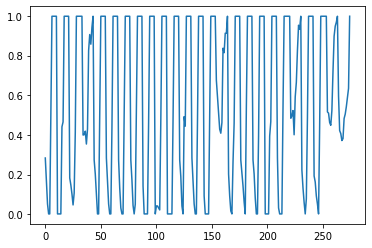

In [7]:
plt.plot(separated_player_dict["2"]["mean_p_threshold"]);